# FIFA-19 Data analysis
Following aspects have been covered as the part of assignment

1. Basic understanding of data set - Includes importing packages, data set, getting column names
2. Diving deep into columns and imputing missing values - Understanding columns, imputing missing values, feature understanding and elimination
3. Transforming the data types in different columns
4. Understanding the correlations bettween pairs of columns
5. Downloading the images from given links using parallel processing
6. 2 sample t-tests between different columns and dependant variables
7. Modelling using linear regression followed by Grid search algorithm to choose best hyper parameters in a pipelined fashion.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import multiprocessing as mp
from time import time

import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.
print("number of cpus", mp.cpu_count())
pool = mp.Pool(mp.cpu_count())
print(pool)

number of cpus 8


In [2]:
fifa_data = pd.read_csv("data.csv")

# Step-1 Basic analysis of data set

1. Get the header information and dimensions of data set

In [3]:
# Basic information about data set
print("Column header information", fifa_data.columns.values)
print("Dimensions of data frame", fifa_data.shape)


Column header information ['Unnamed: 0' 'ID' 'Name' 'Age' 'Photo' 'Nationality' 'Flag' 'Overall'
 'Potential' 'Club' 'Club Logo' 'Value' 'Wage' 'Special' 'Preferred Foot'
 'International Reputation' 'Weak Foot' 'Skill Moves' 'Work Rate'
 'Body Type' 'Real Face' 'Position' 'Jersey Number' 'Joined' 'Loaned From'
 'Contract Valid Until' 'Height' 'Weight' 'LS' 'ST' 'RS' 'LW' 'LF' 'CF'
 'RF' 'RW' 'LAM' 'CAM' 'RAM' 'LM' 'LCM' 'CM' 'RCM' 'RM' 'LWB' 'LDM' 'CDM'
 'RDM' 'RWB' 'LB' 'LCB' 'CB' 'RCB' 'RB' 'Crossing' 'Finishing'
 'HeadingAccuracy' 'ShortPassing' 'Volleys' 'Dribbling' 'Curve'
 'FKAccuracy' 'LongPassing' 'BallControl' 'Acceleration' 'SprintSpeed'
 'Agility' 'Reactions' 'Balance' 'ShotPower' 'Jumping' 'Stamina'
 'Strength' 'LongShots' 'Aggression' 'Interceptions' 'Positioning'
 'Vision' 'Penalties' 'Composure' 'Marking' 'StandingTackle'
 'SlidingTackle' 'GKDiving' 'GKHandling' 'GKKicking' 'GKPositioning'
 'GKReflexes' 'Release Clause']
Dimensions of data frame (18207, 89)


2. First 5 elements using Head()


In [4]:
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


3. In this step, Let's find out acceptable values in each column and also if there are any null values

In [7]:
k=0
for i in fifa_data.columns.values:
    print("count",k)
    print("column name", i)
    print(fifa_data[i].unique(),)
    print("number of unique values", len(fifa_data[i].unique()),"\n")
    k=k+1

In [8]:
fifa_image_data = fifa_data[["ID","Name","Photo","Nationality","Flag","Club","Club Logo"]]


# Step-2 Feature understanding, transformation and missing value imputation

a. We see that England, Germany, Spain and Argentina stand top 4 in contributing the player count


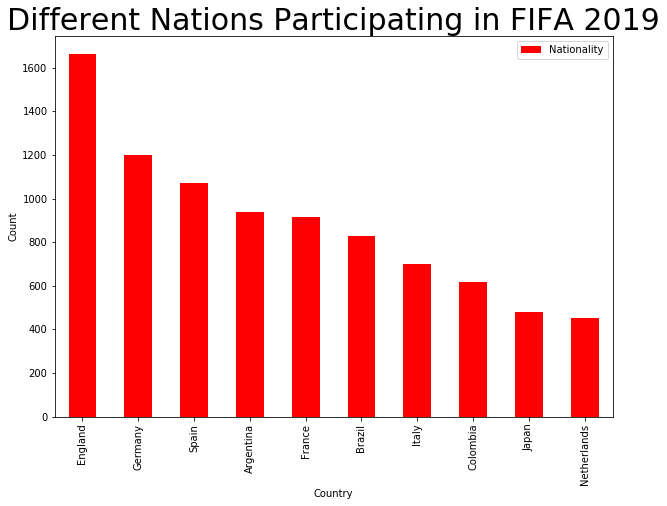

In [9]:
data = pd.DataFrame(fifa_data["Nationality"].value_counts())
data.head(10).plot.bar(color="red", figsize=(10,7))
plt.title('Different Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Everything about age of players- 10 youngest and 10 eldest and their overall scores
Now let us find the most prevalent age group of players. We can see that more about 1400 participants are 21 years old. Please look into the details of participants

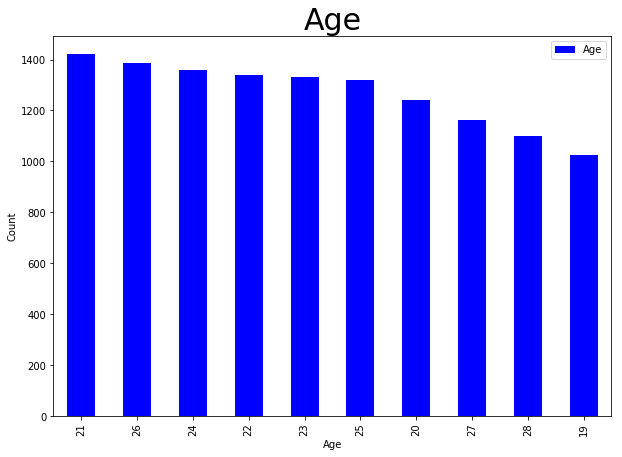

In [10]:
data = pd.DataFrame(fifa_data["Age"].value_counts())
data.head(10).plot.bar(color="Blue", figsize=(10,7))
plt.title('Age', fontsize = 30, fontweight = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



In [11]:
print("Details of youngest participants")
fifa_data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality','Overall']].head(10)

Details of youngest participants


,Name,Age,Club,Nationality,Overall
18206,G. Nugent,16,Tranmere Rovers,England,46
17743,J. Olstad,16,Sarpsborg 08 FF,Norway,52
13293,H. Massengo,16,AS Monaco,France,62
16081,J. Italiano,16,Perth Glory,Australia,58
18166,N. Ayéva,16,Örebro SK,Sweden,48
17712,K. Broda,16,Wisła Kraków,Poland,53
17354,L. D'Arrigo,16,Adelaide United,Australia,54
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium,62
16927,B. Nygren,16,IFK Göteborg,Sweden,56
18018,B. O'Gorman,16,Bray Wanderers,Republic of Ireland,50


c. Following candidates belong to the eldest group

In [12]:
fifa_data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality','Overall']].head(10)

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,NaN,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


# Work rate of participants 

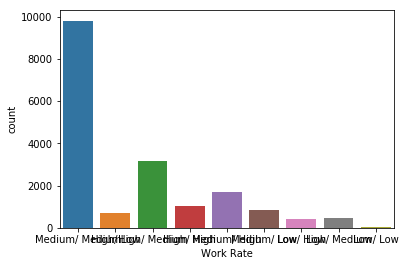

In [13]:
sns.countplot(x="Work Rate", data = fifa_data)

# Imputing Missing values simultaneously

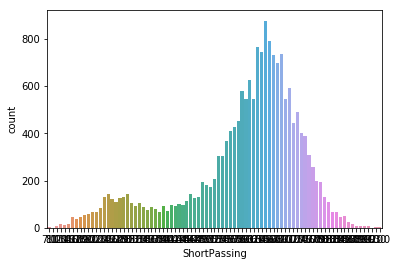

In [14]:
sns.countplot(fifa_data["ShortPassing"])
fifa_data["ShortPassing"].fillna(64, inplace=True)

# Plot to depict Potential of the players
Note it is forming a normal distribution

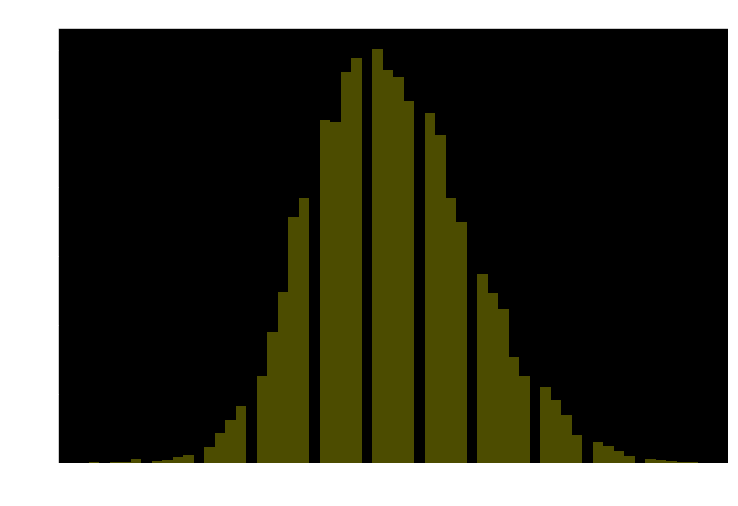

In [15]:
potential_Data= fifa_data.Potential
plt.figure(figsize=(12,8))
plt.style.use('dark_background')

ax = sns.distplot(potential_Data, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of Potential Scores', fontsize = 20)
plt.show()


# Preferred foot of most of players is "Right"!!

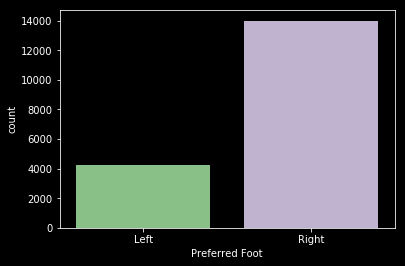

In [16]:
fifa_data["Preferred Foot"].value_counts()
fifa_data["Preferred Foot"]=fifa_data["Preferred Foot"].fillna("Right")
fifa_data["Preferred Foot"].value_counts()
fifa_data["Preferred Foot"].isna().sum()
sns.countplot(x="Preferred Foot", data = fifa_data, palette ="Accent")


# Using mode of the columns to fill missing values

In [17]:
print(fifa_data["Position"].mode())
fifa_data["Position"].fillna("ST",inplace=True)
fifa_data['Height'].fillna("5'11", inplace = True)
fifa_data['Loaned From'].fillna('None', inplace = True)
fifa_data['Joined'].fillna('Jul 1, 2018', inplace = True)
fifa_data['Jersey Number'].fillna(8, inplace = True)

0    ST
dtype: object


# Body types of the players

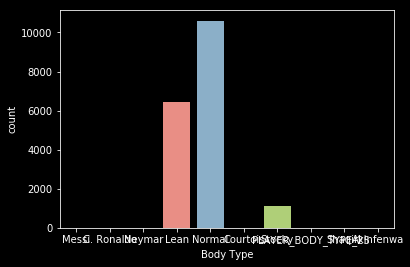

In [18]:
sns.countplot(fifa_data["Body Type"])

We see that Most common body type is "Normal" type. Hence, we filled the missing values in this column with "Normal". Similarly, the remaining columns in the below cell are also filed with their respective "mode" values

In [19]:

fifa_data['Body Type'].fillna('Normal', inplace = True)
fifa_data['Club'].fillna('No Club', inplace = True)
fifa_data['Work Rate'].fillna('Medium/ Medium', inplace = True)

# Contract with clubs  is set only till 2019 [for missing values]

In [20]:
fifa_data["Contract Valid Until"].fillna(2019 , inplace =True)

# Type conversion from "Object" to "Numeric" for suitable columns

Following are the columns with "Object " type of values stored in them. Please note that the columns "LS", "ST" till "RB" have values associated with the positions of the players. Hence, converting them to their possible numeric values

In [21]:
fifa_data.columns.values[28:89]

array(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'], dtype=object)

In [22]:
for i in range(28,89):
    if fifa_data[fifa_data.columns.values[i]].dtype =="object":
        fifa_data[fifa_data.columns.values[i]]=pd.to_numeric(fifa_data[fifa_data.columns.values[i]], errors="coerce")

Missing values in rest all columns of the data frame are filled safely with their mean values after finding out the range of values in each column

In [23]:
for i in range(28, 89):
    fifa_data[fifa_data.columns.values[i]].fillna(fifa_data[fifa_data.columns.values[i]].mean(), inplace =True)

# Skewness and kurtosis of distributions

    In the next step, we shall understand the importance of the special score given to the participants and its distribution. We see that the column data is highly skewed and also big tails which  shows high Kurtosis. Let's get the skewness and kurtosis values of the column

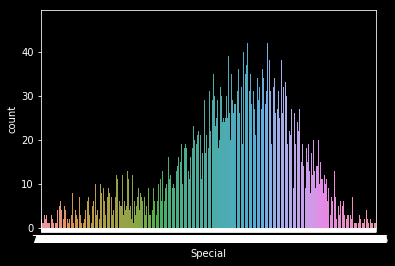

In [24]:
sns.countplot(fifa_data["Special"])


In [25]:
fifa_data["Special"].kurt()

0.33808173582484

In [26]:
fifa_data["Special"].skew()

-0.7058045205361474

Now let us look into weights of the players and distribution being followed by it

In [27]:
fifa_data["Weight"][:5]

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

# Weight conversion and plotting

Column corresponding to weights of players is in string format and hence it is converted to numeric format with the following function

In [28]:
def weights_strip(val):
    if pd.notnull(val):
        val_striped= val[:-3]
        digits = float(val_striped)
        return digits
    else:
        return 0
    return digits
fifa_data["Weight"]= fifa_data["Weight"].apply(weights_strip)

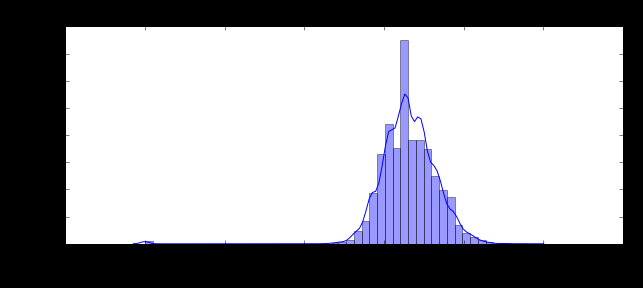

In [29]:
plt.figure(figsize = (10,4))
plt.style.use('_classic_test')
sns.distplot(fifa_data['Weight'], color = 'blue')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

# String to int conversion for heights of players

In [30]:

def heightstrtoint(h):
    if type(h) is str:
        h = (float(h[0])*12) + float(h[2:])
    return h
fifa_data["Height"]= fifa_data["Height"].apply(heightstrtoint)

In [31]:
fifa_data.loc[1,"Height"]

74.0

# Weak foot histogram plot

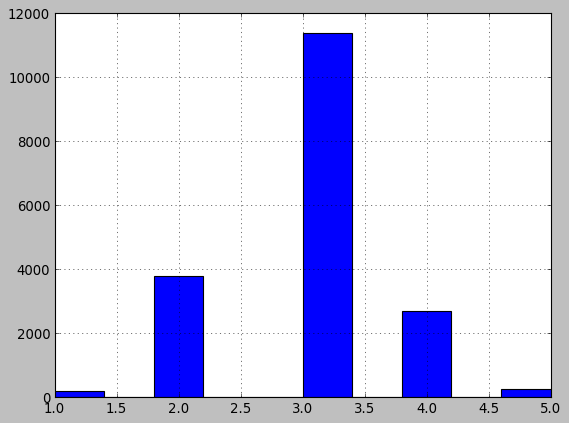

In [32]:
fifa_data["Weak Foot"].mode()
fifa_data["Weak Foot"].hist()


Now let us fill the weak foot column

In [33]:
fifa_data["Weak Foot"]= fifa_data["Weak Foot"].fillna(3)
fifa_data["Weak Foot"].isna().sum()
fifa_data["Weak Foot"].fillna(1, inplace =True)


# Skill moves
Now let us understand "Skill Moves". A score of 5 corresponds to complex skill set and score of 1 corresponds to simple skill set

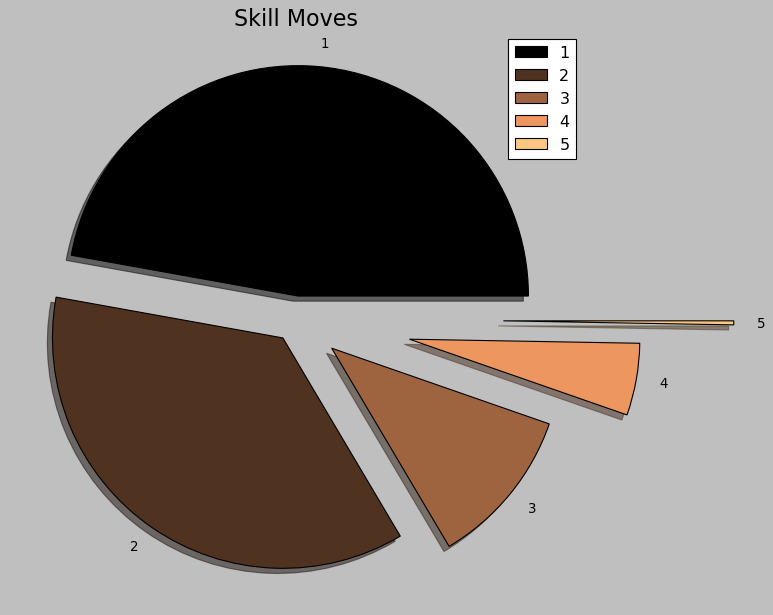

In [34]:
labels = ['1', '2', '3', '4', '5']
k = fifa_data['Skill Moves'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (18, 9)
plt.pie(k, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Skill Moves', fontsize = 20)
plt.legend()
plt.show()

In [35]:
print(fifa_data['Skill Moves'].value_counts())
fifa_data["Skill Moves"].mode()

fifa_data["Skill Moves"] = fifa_data['Skill Moves'].fillna(3.0)

2.0    8565
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64


# International reputation of players
Now let us understand more about International reputation. International reputation potentially increases player's overall rating. Most common value is 1

In [36]:
fifa_data["International Reputation"].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

In [37]:
fifa_data["International Reputation"].fillna(1.0, inplace=True)

Now let's look into "Position" column which tells about the positions taken by players like GK - Goal keeper, Center Backs (CB), mid fielders [MD]

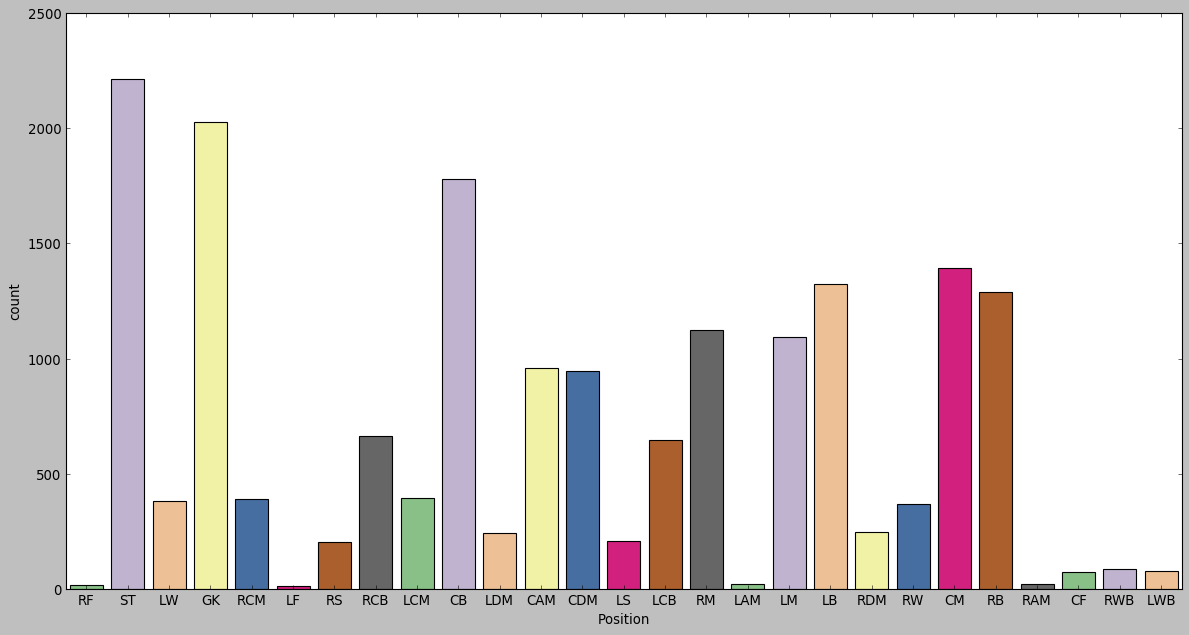

In [38]:
sns.countplot(x="Position", data =fifa_data, palette ="Accent")

# Similarly, in the below cells lets fill the rest of missing values using mode and mean of the correponding columns

In [39]:
fifa_data["Real Face"]= fifa_data["Real Face"].fillna("Yes")
fifa_data["Position"].fillna("ST", inplace=True)


In [40]:
fifa_data["Crossing"].fillna(fifa_data["Crossing"].mean(), inplace=True)
fifa_data["Finishing"].fillna(fifa_data["Finishing"].mean(), inplace =True)
fifa_data["HeadingAccuracy"].fillna(fifa_data["HeadingAccuracy"].mean(), inplace =True)


In [41]:
fifa_data.columns.values
fifa_data1 = fifa_data.drop(['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM',
                            'CDM','RDM','RWB','LB','CB','LCB','RCB','RB','Release Clause'],axis=1)

In [42]:
len(fifa_data1)

18207

# Step-3 Data analysis- 

## 1. Top 10 players with Preferred foot as "Left"

In [43]:
top_10=fifa_data[fifa_data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)
len(fifa_data)

18207

## 2. Top 10 players with preferred foot as "Right"

In [44]:
top_10_right =fifa_data[fifa_data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

 ## 3. Top 10 eldest players with  their overall ratings

In [45]:
sort_value =fifa_data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality','Overall']].head(5)


## 4.Top 10 youngest players with their overall ratings

In [46]:
sort_valued=fifa_data.sort_values('Age',ascending =True)[['Name','Age','Club','Nationality','Overall']].head(5)
len(fifa_data)

18207

## 5. Let us see if there exists any relationshup between Age and overall columns

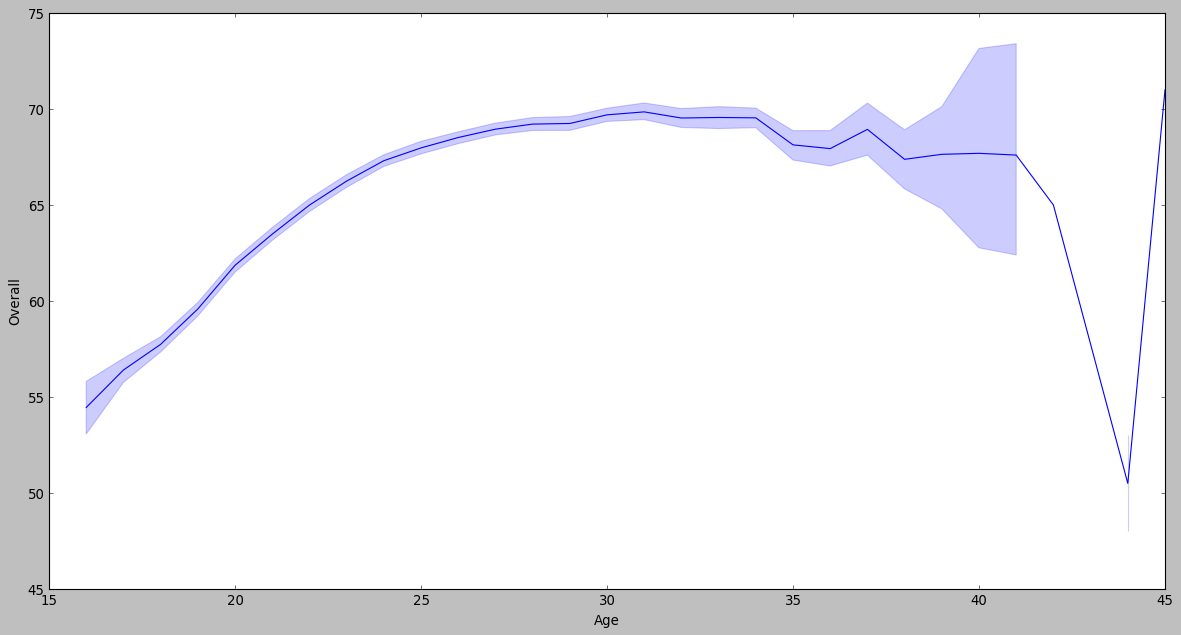

In [47]:
sns.lineplot(x="Age", y="Overall", data =fifa_data)

## Players with highest ratings for a given position

In [62]:
fifa_data.iloc[fifa_data.groupby(fifa_data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Nationality']]

,Position,Name,Age,Nationality
17,CAM,A. Griezmann,27,France
12,CB,D. Godín,32,Uruguay
20,CDM,Sergio Busquets,29,Spain
271,CF,Luis Alberto,25,Spain
67,CM,Thiago,27,Spain
3,GK,De Gea,27,Spain
28,LAM,J. Rodríguez,26,Colombia
35,LB,Marcelo,30,Brazil
24,LCB,G. Chiellini,33,Italy
11,LCM,T. Kroos,28,Germany


# Let us see important attributes of players for given age groups 

In [63]:
attributes = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in fifa_data.groupby(fifa_data['Age'])[attributes].mean().iterrows():
    print('Age {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))
len(fifa_data)

Age 16: Balance, Acceleration, Jumping
Age 17: Balance, Acceleration, Agility
Age 18: Balance, Acceleration, Jumping
Age 19: Balance, Acceleration, Agility
Age 20: Acceleration, Balance, Agility
Age 21: Acceleration, Balance, Agility
Age 22: Acceleration, Balance, Jumping
Age 23: Acceleration, Balance, Agility
Age 24: Acceleration, Jumping, Agility
Age 25: Acceleration, Jumping, Agility
Age 26: Acceleration, Jumping, Agility
Age 27: Jumping, Acceleration, Agility
Age 28: Jumping, Acceleration, Agility
Age 29: Jumping, Agility, Acceleration
Age 30: Jumping, Agility, Acceleration
Age 31: Jumping, Composure, Agility
Age 32: Jumping, Composure, Aggression
Age 33: Jumping, Composure, Aggression
Age 34: Jumping, Composure, Balance
Age 35: Jumping, Composure, Balance
Age 36: Jumping, Composure, Aggression
Age 37: Composure, Jumping, Balance
Age 38: Jumping, Composure, Balance
Age 39: Jumping, Composure, Balance
Age 40: Jumping, Composure, Balance
Age 41: Composure, Balance, Jumping
Age 42: GK

18207

# Let us see what influences a particular position the most

In [64]:
attributes = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in fifa_data.groupby(fifa_data['Position'])[attributes].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

# Stamina vs Position graph.We dont see much difference though

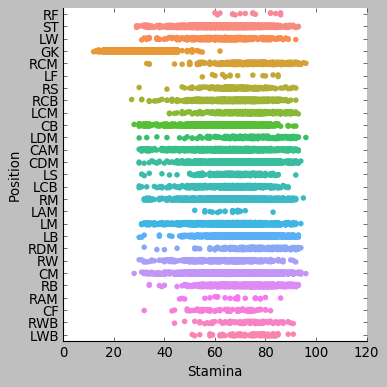

In [65]:
sns.catplot(x="Stamina", y="Position", data =fifa_data)

# Potential Vs Overall rating

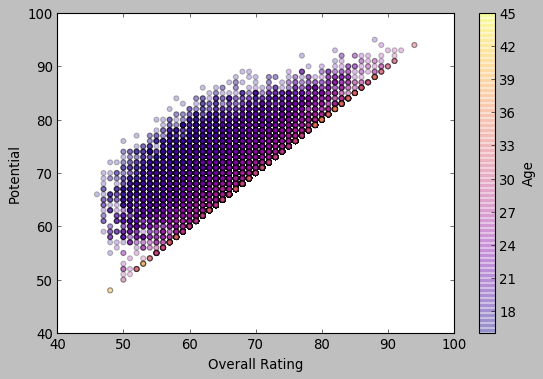

In [66]:
plt.figure(figsize=[8,5])
plt.scatter(x=fifa_data["Overall"], y=fifa_data["Potential"], c=fifa_data["Age"], alpha=0.25, cmap='plasma' )
plt.colorbar().set_label('Age')
plt.xlabel('Overall Rating')
plt.ylabel('Potential')
plt.show()

# Work rate, name, age ,nationality, club of Players with best ratings  at given position

In [67]:
fifa_data.iloc[fifa_data.groupby(fifa_data['Position'])['Overall'].idxmax()][['Work Rate', 'Name', 'Age', 'Nationality',"Club"]]

,Work Rate,Name,Age,Nationality,Club
17,High/ High,A. Griezmann,27,France,Atlético Madrid
12,Medium/ High,D. Godín,32,Uruguay,Atlético Madrid
20,Medium/ Medium,Sergio Busquets,29,Spain,FC Barcelona
271,High/ Medium,Luis Alberto,25,Spain,Lazio
67,Medium/ Medium,Thiago,27,Spain,FC Bayern München
3,Medium/ Medium,De Gea,27,Spain,Manchester United
28,Medium/ Medium,J. Rodríguez,26,Colombia,FC Bayern München
35,High/ Low,Marcelo,30,Brazil,Real Madrid
24,Medium/ High,G. Chiellini,33,Italy,Juventus
11,Medium/ Medium,T. Kroos,28,Germany,Real Madrid


# Let us understand the output variables "Value" and "Wage"

In [68]:
def convert_val_to_float(val):
    try:
        digit = float(val[1:-1])
        if val[-1:]=='M':
            digit = digit * 1000000
        elif val[-1:]=='K':
            digit = digit * 1000
    except ValueError:
        digit =0
    return digit

fifa_data["Value"]=fifa_data["Value"].apply(convert_val_to_float)
fifa_data["Wage"]= fifa_data["Wage"].apply(convert_val_to_float)
        
len(fifa_data) 

TypeError: 'float' object is not subscriptable

# Players from important nations and their wages

In [ ]:
print("Number of players and countries they belong to", fifa_data["Nationality"].value_counts())
Nationalities = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_national = fifa_data.loc[fifa_data['Nationality'].isin(Nationalities) & fifa_data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_national['Nationality'], y = fifa_data['Wage'], palette = 'Blues')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

# Wages distribution of players for all the countries participating

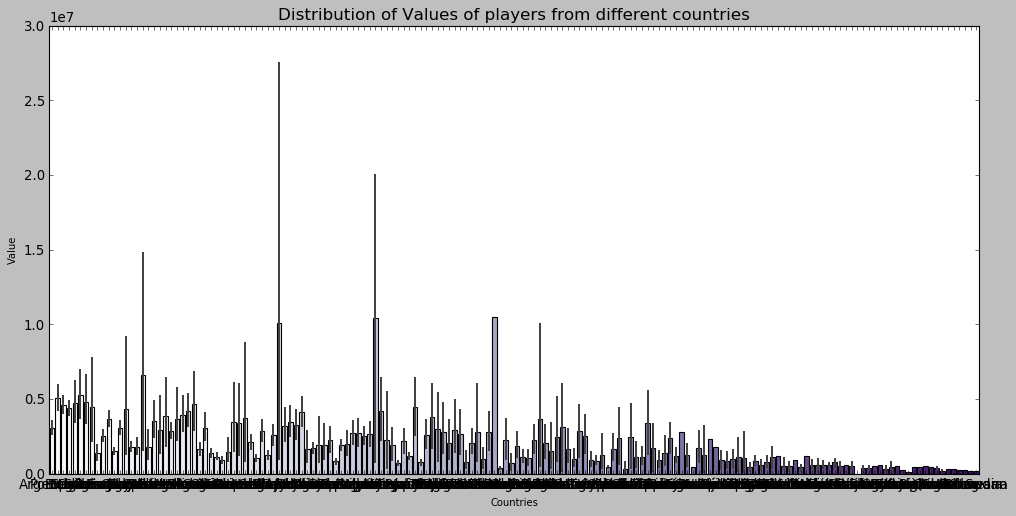

In [69]:

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = fifa_data['Nationality'], y = fifa_data['Value'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Value', fontsize = 9)
ax.set_title(label = 'Distribution of Values of players from different countries', fontsize = 15)
plt.show()

# Best clubs and the distribution of wages in them

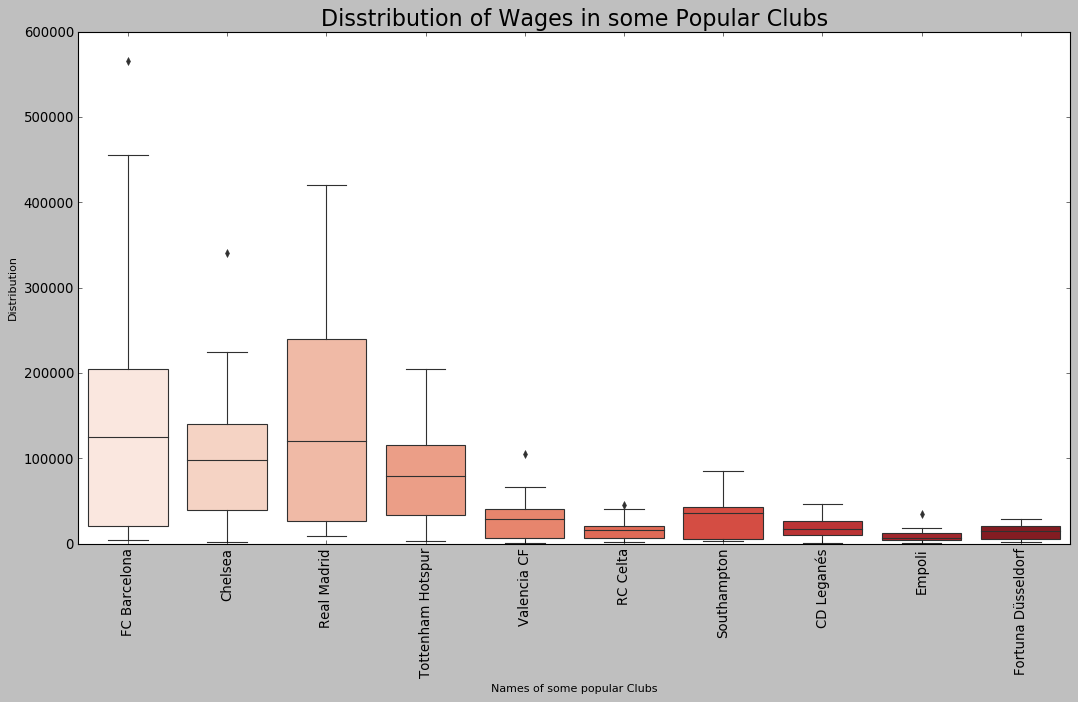

In [70]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

club_Data = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = club_Data, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [71]:
players_data = fifa_data[["Name","Age","Height","Weight","Agility","Work Rate","Skill Moves","Stamina","BallControl","Potential","HeadingAccuracy","SprintSpeed","ShortPassing","LongShots","Jumping","Position","Overall","Wage","Value","International Reputation","Special"]]

#   Step-4  
# Sample T tests between all input attributes and dependant variables [Value, Wage]

Let us try to perform the t tests between the few important columns and "Value" Column

In [72]:
# array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
#        'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
#        'Special', 'Preferred Foot', 'International Reputation',
#        'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
#        'Position', 'Jersey Number', 'Joined', 'Loaned From',
#        'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
#        'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
#        'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
#        'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
#        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
#        'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
#        'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
#        'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
#        'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
#        'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
#        'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
#       dtype=object)

In [73]:
fifa_col_data= fifa_data[["Age","International Reputation","Weak Foot","Agility","ShortPassing","LongPassing","Stamina","Strength","Weight","Overall","Skill Moves","Wage","Value"]]
fifa_col = fifa_col_data.columns.values
scaler =StandardScaler()
fifa_data_transformed = scaler.fit_transform(fifa_col_data)
fifa_data_new = pd.DataFrame(data = fifa_data_transformed,columns=fifa_col)
for i in fifa_col:
    print("T test between",i, " and Value  columns")
    tset, pval=ttest_ind(fifa_data_new[i], fifa_data_new["Value"])
    print(tset, pval,"\n")

T test between Age  and Value  columns
1.668100056023143e-14 0.9999999999999867 

T test between International Reputation  and Value  columns
-1.3702250460190103e-14 0.9999999999999891 

T test between Weak Foot  and Value  columns
-2.978750100041327e-15 0.9999999999999977 

T test between Agility  and Value  columns
5.4809001840760416e-14 0.9999999999999563 

T test between ShortPassing  and Value  columns
5.957500200082652e-15 0.9999999999999952 

T test between LongPassing  and Value  columns
-2.3830000800330614e-15 0.9999999999999981 

T test between Stamina  and Value  columns
-3.931950132054552e-14 0.9999999999999686 

T test between Strength  and Value  columns
-2.0255500680281017e-14 0.9999999999999838 

T test between Weight  and Value  columns
-6.374525214088439e-14 0.9999999999999492 

T test between Overall  and Value  columns
3.2170501080446326e-14 0.9999999999999744 

T test between Skill Moves  and Value  columns
-7.149000240099185e-15 0.9999999999999943 

T test between

C:\Users\GayatriDatascientist\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\GayatriDatascientist\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [74]:
for i in fifa_col:
    print("T test between",i, " and Wage  columns")
    tset, pval=ttest_ind(fifa_data_new[i], fifa_data_new["Wage"])
    print(tset, pval,"\n")

T test between Age  and Wage  columns
1.429800048019837e-14 0.9999999999999886 

T test between International Reputation  and Wage  columns
-1.6085250540223163e-14 0.9999999999999871 

T test between Weak Foot  and Wage  columns
-5.3617501800743864e-15 0.9999999999999957 

T test between Agility  and Wage  columns
5.242600176072734e-14 0.9999999999999581 

T test between ShortPassing  and Wage  columns
3.574500120049591e-15 0.9999999999999971 

T test between LongPassing  and Wage  columns
-4.766000160066122e-15 0.9999999999999962 

T test between Stamina  and Wage  columns
-4.170250140057857e-14 0.9999999999999667 

T test between Strength  and Wage  columns
-2.2638500760314077e-14 0.9999999999999819 

T test between Weight  and Wage  columns
-6.612825222091745e-14 0.9999999999999473 

T test between Overall  and Wage  columns
2.978750100041326e-14 0.9999999999999762 

T test between Skill Moves  and Wage  columns
-9.532000320132244e-15 0.9999999999999923 

T test between Wage  and Wa

# Step-5 Correlations between important columns|

,Age,Height,Weight,Agility,Skill Moves,Stamina,BallControl,Potential,HeadingAccuracy,SprintSpeed,ShortPassing,LongShots,Jumping,Overall,Wage,Value,International Reputation,Special
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000
mean,25.122206,71.360301,165.541550,63.503607,2.362992,63.219946,58.369459,71.307299,52.298144,64.726967,58.700720,47.109973,65.089432,66.238699,9731.312133,2.410696e+06,1.112924,1597.809908
std,4.669943,2.646233,17.746909,14.746571,0.755876,15.873774,16.664584,6.136496,17.356983,14.630628,14.682633,19.235118,11.804452,6.908930,21999.290406,5.594933e+06,0.393554,272.586016
min,16.000000,61.000000,0.000000,14.000000,1.000000,12.000000,5.000000,48.000000,4.000000,12.000000,7.000000,3.000000,15.000000,46.000000,0.000000,0.000000e+00,1.000000,731.000000
25%,21.000000,69.000000,154.000000,55.000000,2.000000,56.000000,54.000000,67.000000,45.000000,57.000000,54.000000,33.000000,58.000000,62.000000,1000.000000,3.000000e+05,1.000000,1457.000000
50%,25.000000,71.000000,165.000000,66.000000,2.000000,66.000000,63.000000,71.000000,56.000000,67.000000,62.000000,51.000000,66.000000,66.000000,3000.000000,6.750000e+05,1.000000,1635.000000
75%,28.000000,73.000000,176.000000,74.000000,3.000000,74.000000,69.000000,75.000000,64.000000,75.000000,68.000000,62.000000,73.000000,71.000000,9000.000000,2.000000e+06,1.000000,1787.000000
max,45.000000,81.000000,243.000000,96.000000,5.000000,96.000000,96.000000,95.000000,94.000000,96.000000,93.000000,94.000000,95.000000,94.000000,565000.000000,1.185000e+08,5.000000,2346.000000


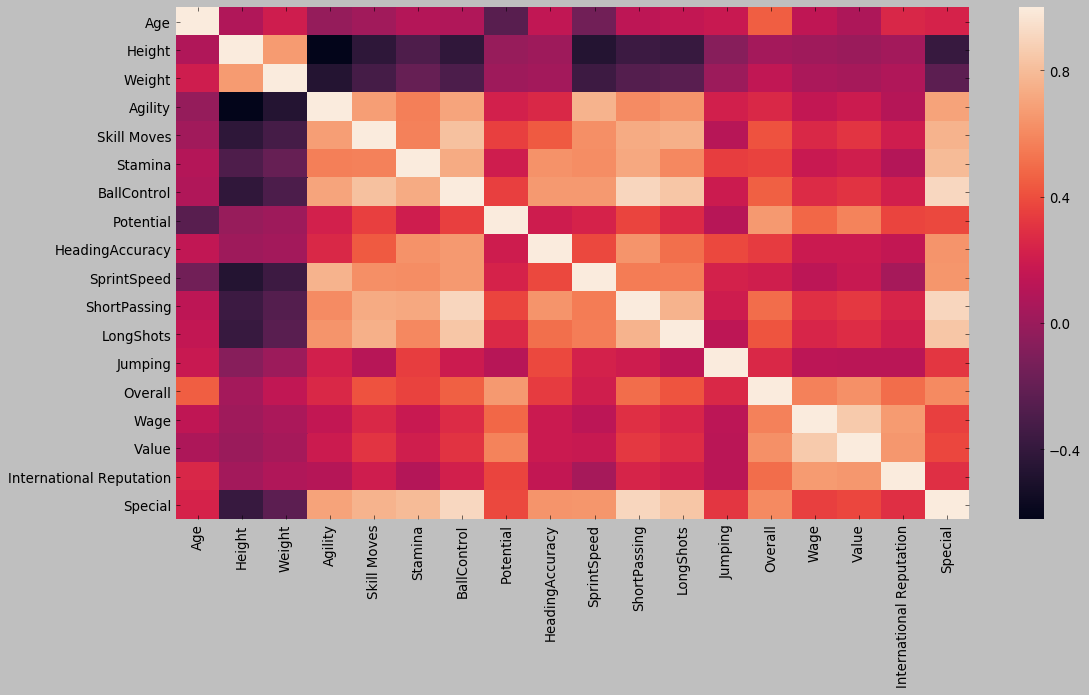

In [75]:
import seaborn as sns
corr_PLayer = players_data.corr()
sns.heatmap(corr_PLayer, 
        xticklabels=corr_PLayer.columns,
        yticklabels=corr_PLayer.columns)
players_data.describe()

We see that most correlated features are "Overall","Potential","Skill Moves","International Reputation","Special","Ball Controlling" to "Value" and "Wage"
So let us try to use these features mostly in our modelling

# Step-6 Downloading image data using parallel processing

In [76]:

#Data download
fifa_image_Data = fifa_data[["ID","Name","Photo","Flag","Club Logo","Club","Nationality"]]

In [77]:
fifa_image_data
list_of_photo_urls = list(fifa_data["Photo"])
list_of_Flag = list(fifa_data["Flag"])
list_of_Club = list(fifa_data["Club Logo"])
list_of_names = list(fifa_data["Name"])
list_of_countries = list(fifa_data["Nationality"])
list_of_club_names = list(fifa_data["Club"])

In [78]:
import requests
def download_player_image(url):
    
    with open("./photo/"+url[1]+".png", 'wb+') as handle:
        response = requests.get(url[0], stream=True)
        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            if not block:
                break

            handle.write(block)
def download_Club_image(url):
    
    with open("./Club/"+url[1]+".png", 'wb+') as handle:
        response = requests.get(url[0], stream=True)
        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            if not block:
                break

            handle.write(block)
def download_Flag_image(url):
    
    with open("./Nationality/"+url[1]+".png", 'wb+') as handle:
        response = requests.get(url[0], stream=True)
        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            if not block:
                break

            handle.write(block)
pool = mp.Pool(mp.cpu_count()) # how much parallelism?
pool

##  Downloading the Photos of players with Thread pool. The elapsed time can be seen below


In [79]:
from multiprocessing.pool import ThreadPool
job_args = [(item_a, list_of_names[i]) for i, item_a in enumerate(list_of_photo_urls)] 
flag_args =[(item_b, list_of_countries[i]) for i , item_b in enumerate(list_of_Flag)]
club_args=[(item_c, list_of_club_names[i]) for i , item_c in enumerate(list_of_Club)]
start_time = time()
results = ThreadPool(8).imap_unordered(download_player_image, job_args)
# ThreadPool(9).imap_unordered(url_response, urls)
end_time = time()
print("Elapsed Time: for players photos", end_time-start_time)


Elapsed Time: for players photos 0.05333209037780762


In [80]:
time3 = time()
results= ThreadPool(9).imap_unordered(download_Flag_image,flag_args)
time4 = time()
print("Elapsed time for Flags", time4-time3)

Elapsed time for Flags 0.048761844635009766


In [81]:
time5 = time()
results= ThreadPool(9).imap_unordered(download_Club_image,club_args)
time6 = time()
print("Elapsed time for club", time4-time3)

Elapsed time for club 0.048761844635009766


# Step-7 Building the Model

In [82]:
fifa_data.columns.values
fifa_new = fifa_data[["Age","International Reputation","Overall","Special","Stamina","Weak Foot","Skill Moves","Height","Weight","Strength","Potential","Value","Wage"]]

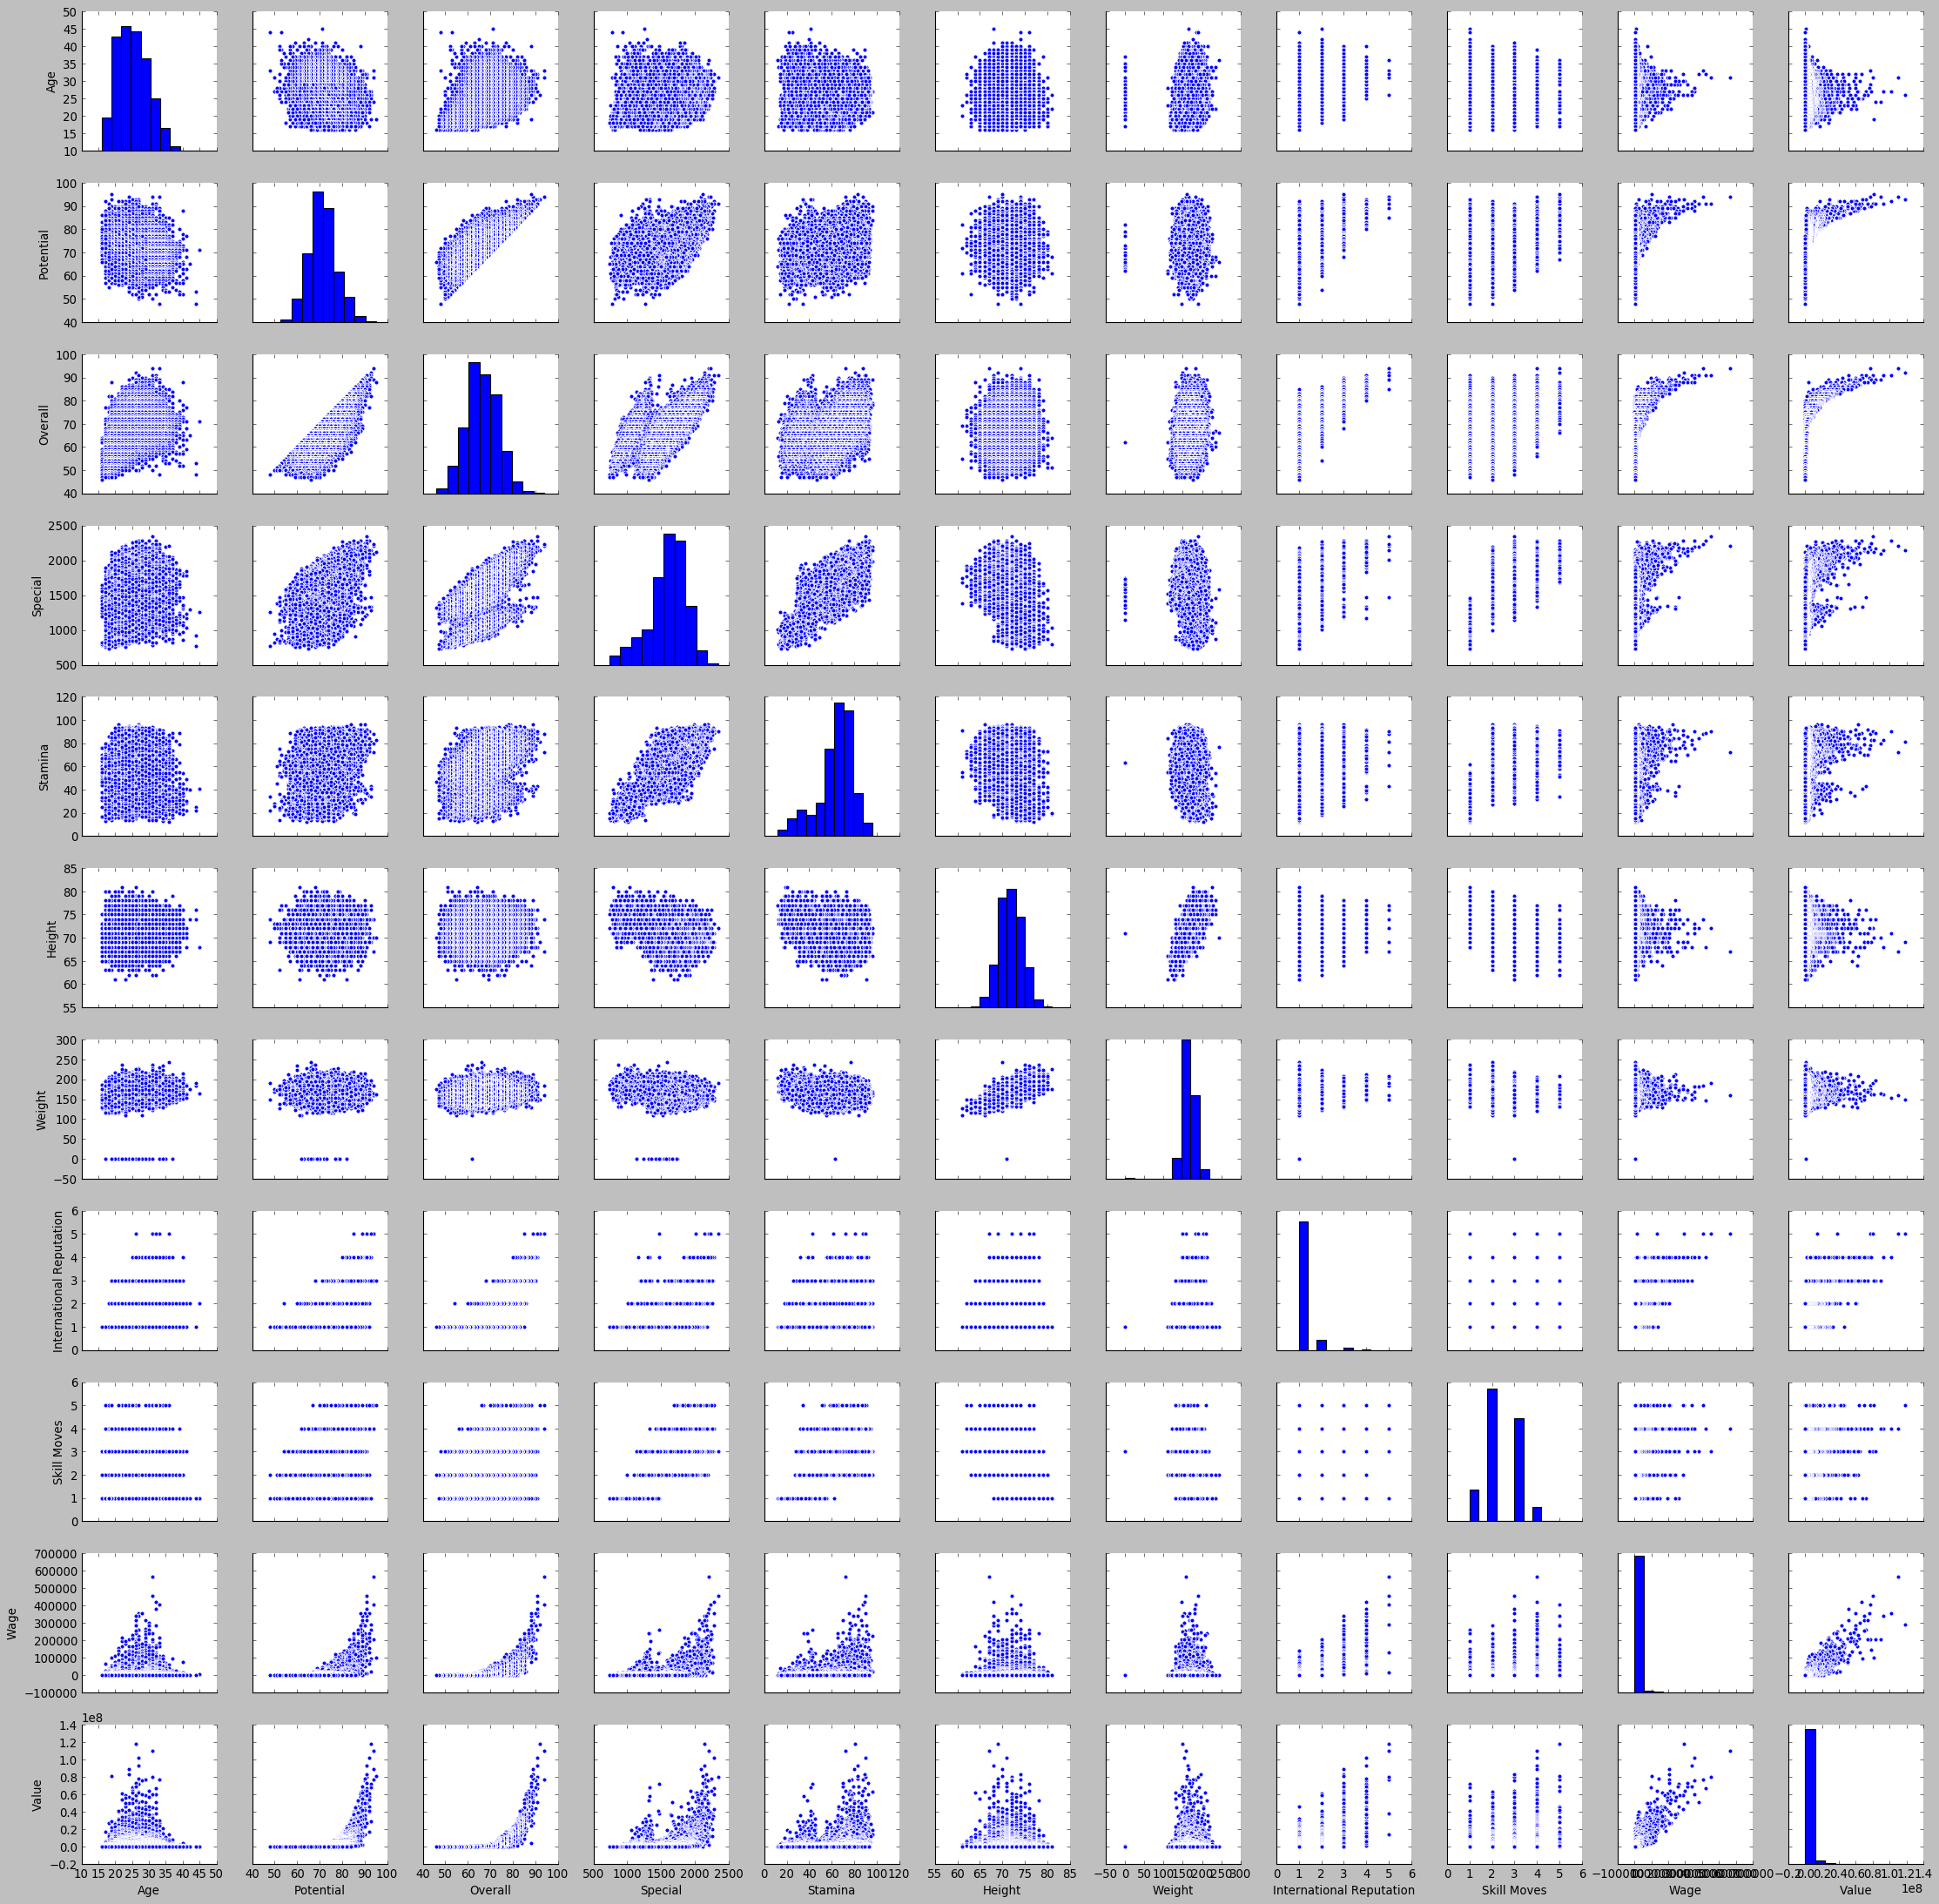

In [83]:
Value_prediction = fifa_data[["Age","Potential","Overall","Special","Stamina","Height","Weight","International Reputation","Skill Moves","Wage","Value"]]
Wage = Value_prediction["Wage"]
Value = Value_prediction["Value"]
output = Value_prediction[["Wage","Value"]]
sns.pairplot(Value_prediction)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler1 =scaler.fit(Value_prediction)
scaled_data =scaler1.transform(Value_prediction)
data = pd.DataFrame(data= scaled_data , columns = Value_prediction.columns.values)
data2= data.drop(["Value"],axis =1)
data1 = data.drop(["Value","Wage"],axis=1)
len(data1)

C:\Users\GayatriDatascientist\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\GayatriDatascientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


18207

# Train test split

In [85]:
fifa_train, fifa_test, wage_train, wage_test = train_test_split(data1,Wage, test_size=0.33, random_state=42)
fifa_train2, fifa_test2, value_train, value_test = train_test_split(data2, Value, test_size=0.33, random_state=42)

In [86]:
print("Wage prediction data",fifa_train.shape)

Wage prediction data (12198, 9)


In [87]:
print("VALUE PREDICTION DATA", fifa_train2.shape)
value_train.shape

VALUE PREDICTION DATA (12198, 10)


(12198,)

# Basic dummy model using Linear Regression to model wages

In [88]:

from time import time
start_time = time()
lm =LinearRegression().fit(fifa_train, wage_train)
end_time = time()
print("total time", end_time-start_time)
print(lm.score(fifa_test, wage_test))

total time 0.24418854713439941
0.5421720439796059


# Basic model to model "Value"

In [89]:
from sklearn.linear_model import LinearRegression
from time import time
start_time = time()
lm =LinearRegression().fit(fifa_train2, value_train)
end_time = time()
print("total time", end_time-start_time)


total time 0.004412651062011719


# Cross validation

In [90]:
scores = cross_val_score(lm, fifa_train, wage_train, cv=5)
print("all score",scores)
print("Score of Linear regression on test data",lm.score(fifa_test2, value_test))

all score [0.5701452  0.52441777 0.52743105 0.54516698 0.54283456]
Score of Linear regression on test data 0.8181479891441468


In [91]:
scores_values = cross_val_score(lm, fifa_train2,value_train, cv=5)
print("scores", scores_values)

scores [0.77122885 0.81995416 0.76985512 0.76624073 0.77812917]


## Grid search for linear Regression

## Value prediction

In [92]:
fifa_test.columns.unique()
fifa_test2.fillna(fifa_test2.mean(), inplace=True)

C:\Users\GayatriDatascientist\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [93]:

model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(model,parameters, cv=10)
grid.fit(fifa_train2, value_train)
print("r2 / variance : ", grid.best_score_)
grid.score(fifa_test2,value_test)


r2 / variance :  0.78097048235478


0.8181479891441468

# Wage prediction

In [94]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(model,parameters, cv=10)
grid.fit(fifa_train, wage_train)
print("r2 / variance : ", grid.best_score_)
print("on test data", grid.score(fifa_test,wage_test))

r2 / variance :  0.535481608679073
on test data 0.5421720439796058


# Polynomial regression

In [95]:
poly_model = PolynomialFeatures(degree=2)
fifa_train_poly = poly_model.fit_transform(fifa_train)
fifa_train3 = poly_model.fit_transform(fifa_train2)
fifa_test_poly = poly_model.fit_transform(fifa_test)
fifa_test_poly2 = poly_model.fit_transform(fifa_test2)

NameError: name 'PolynomialFeatures' is not defined

# Wage prediction using Polynomial regression

In [ ]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(model,parameters, cv=10)
grid.fit(fifa_train_poly, wage_train)
print("r2 / variance : ", grid.best_score_)
print("on test data", grid.score(fifa_test_poly, wage_test))

# Value prediction using Polynomial regression

In [ ]:
grid.fit(fifa_train3,value_train)
print("r2 / variance : ", grid.best_score_)
print("on test data", grid.score(fifa_test_poly2, value_test))